## Umap plot of exploratory set

### Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define functions

In [2]:
# load umap data
umap = pd.read_csv('data/Corsello_umap.csv')

def plot_drug_umap(drug, design=['LYN'], predict=['BRAF']):
    umap_x = umap.loc[:, 'x'].values
    umap_y = umap.loc[:, 'y'].values
    groups = []
    design, predict = np.array(design), np.array(predict)
    imp_x, imp_y = [], []
    drug_x, drug_y = None, None
    for i in umap.index:
        name = umap.loc[i, 'name']
        x = umap.loc[i, 'x']
        y = umap.loc[i, 'y']
        target = str(umap.loc[i, 'target']).split(', ')
        target = np.array(target)
        if name == drug:
            if name == 'KD025':
                name = drug = 'belumosudil'     # Synonyms
            g = drug
            drug_x, drug_y = x, y
        elif len(np.intersect1d(design, target)) >= 1:
            g = '/'.join(design) + ' drug'
        elif len(np.intersect1d(predict, target)) >= 1:
            g = '/'.join(predict) + ' drug'
        else:
            continue
        imp_x.append(x)
        imp_y.append(y)
        groups.append(g)
    
    if len(predict) == 0:
        hue_group = [drug, 
                     '/'.join(design) + ' drug']
        flatui = ['#FF0000', '#0000CD']
    else:
        hue_group = [drug, 
                     '/'.join(design) + ' drug', 
                     '/'.join(predict) + ' drug']
        flatui = ['#FF0000', '#0000CD', '#2E8B57']
    
    sns.scatterplot(x = umap_x, y = umap_y, alpha = 0.5, color = 'silver')
    sns.scatterplot(x = imp_x, y = imp_y, hue=groups, hue_order=hue_group, palette = flatui)
    plt.scatter(drug_x, drug_y, s=40, color = 'red')
    plt.title(drug, loc='left', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel('umap_x', fontsize = 15)
    plt.ylabel('umap_y', fontsize = 15)

### Plot results

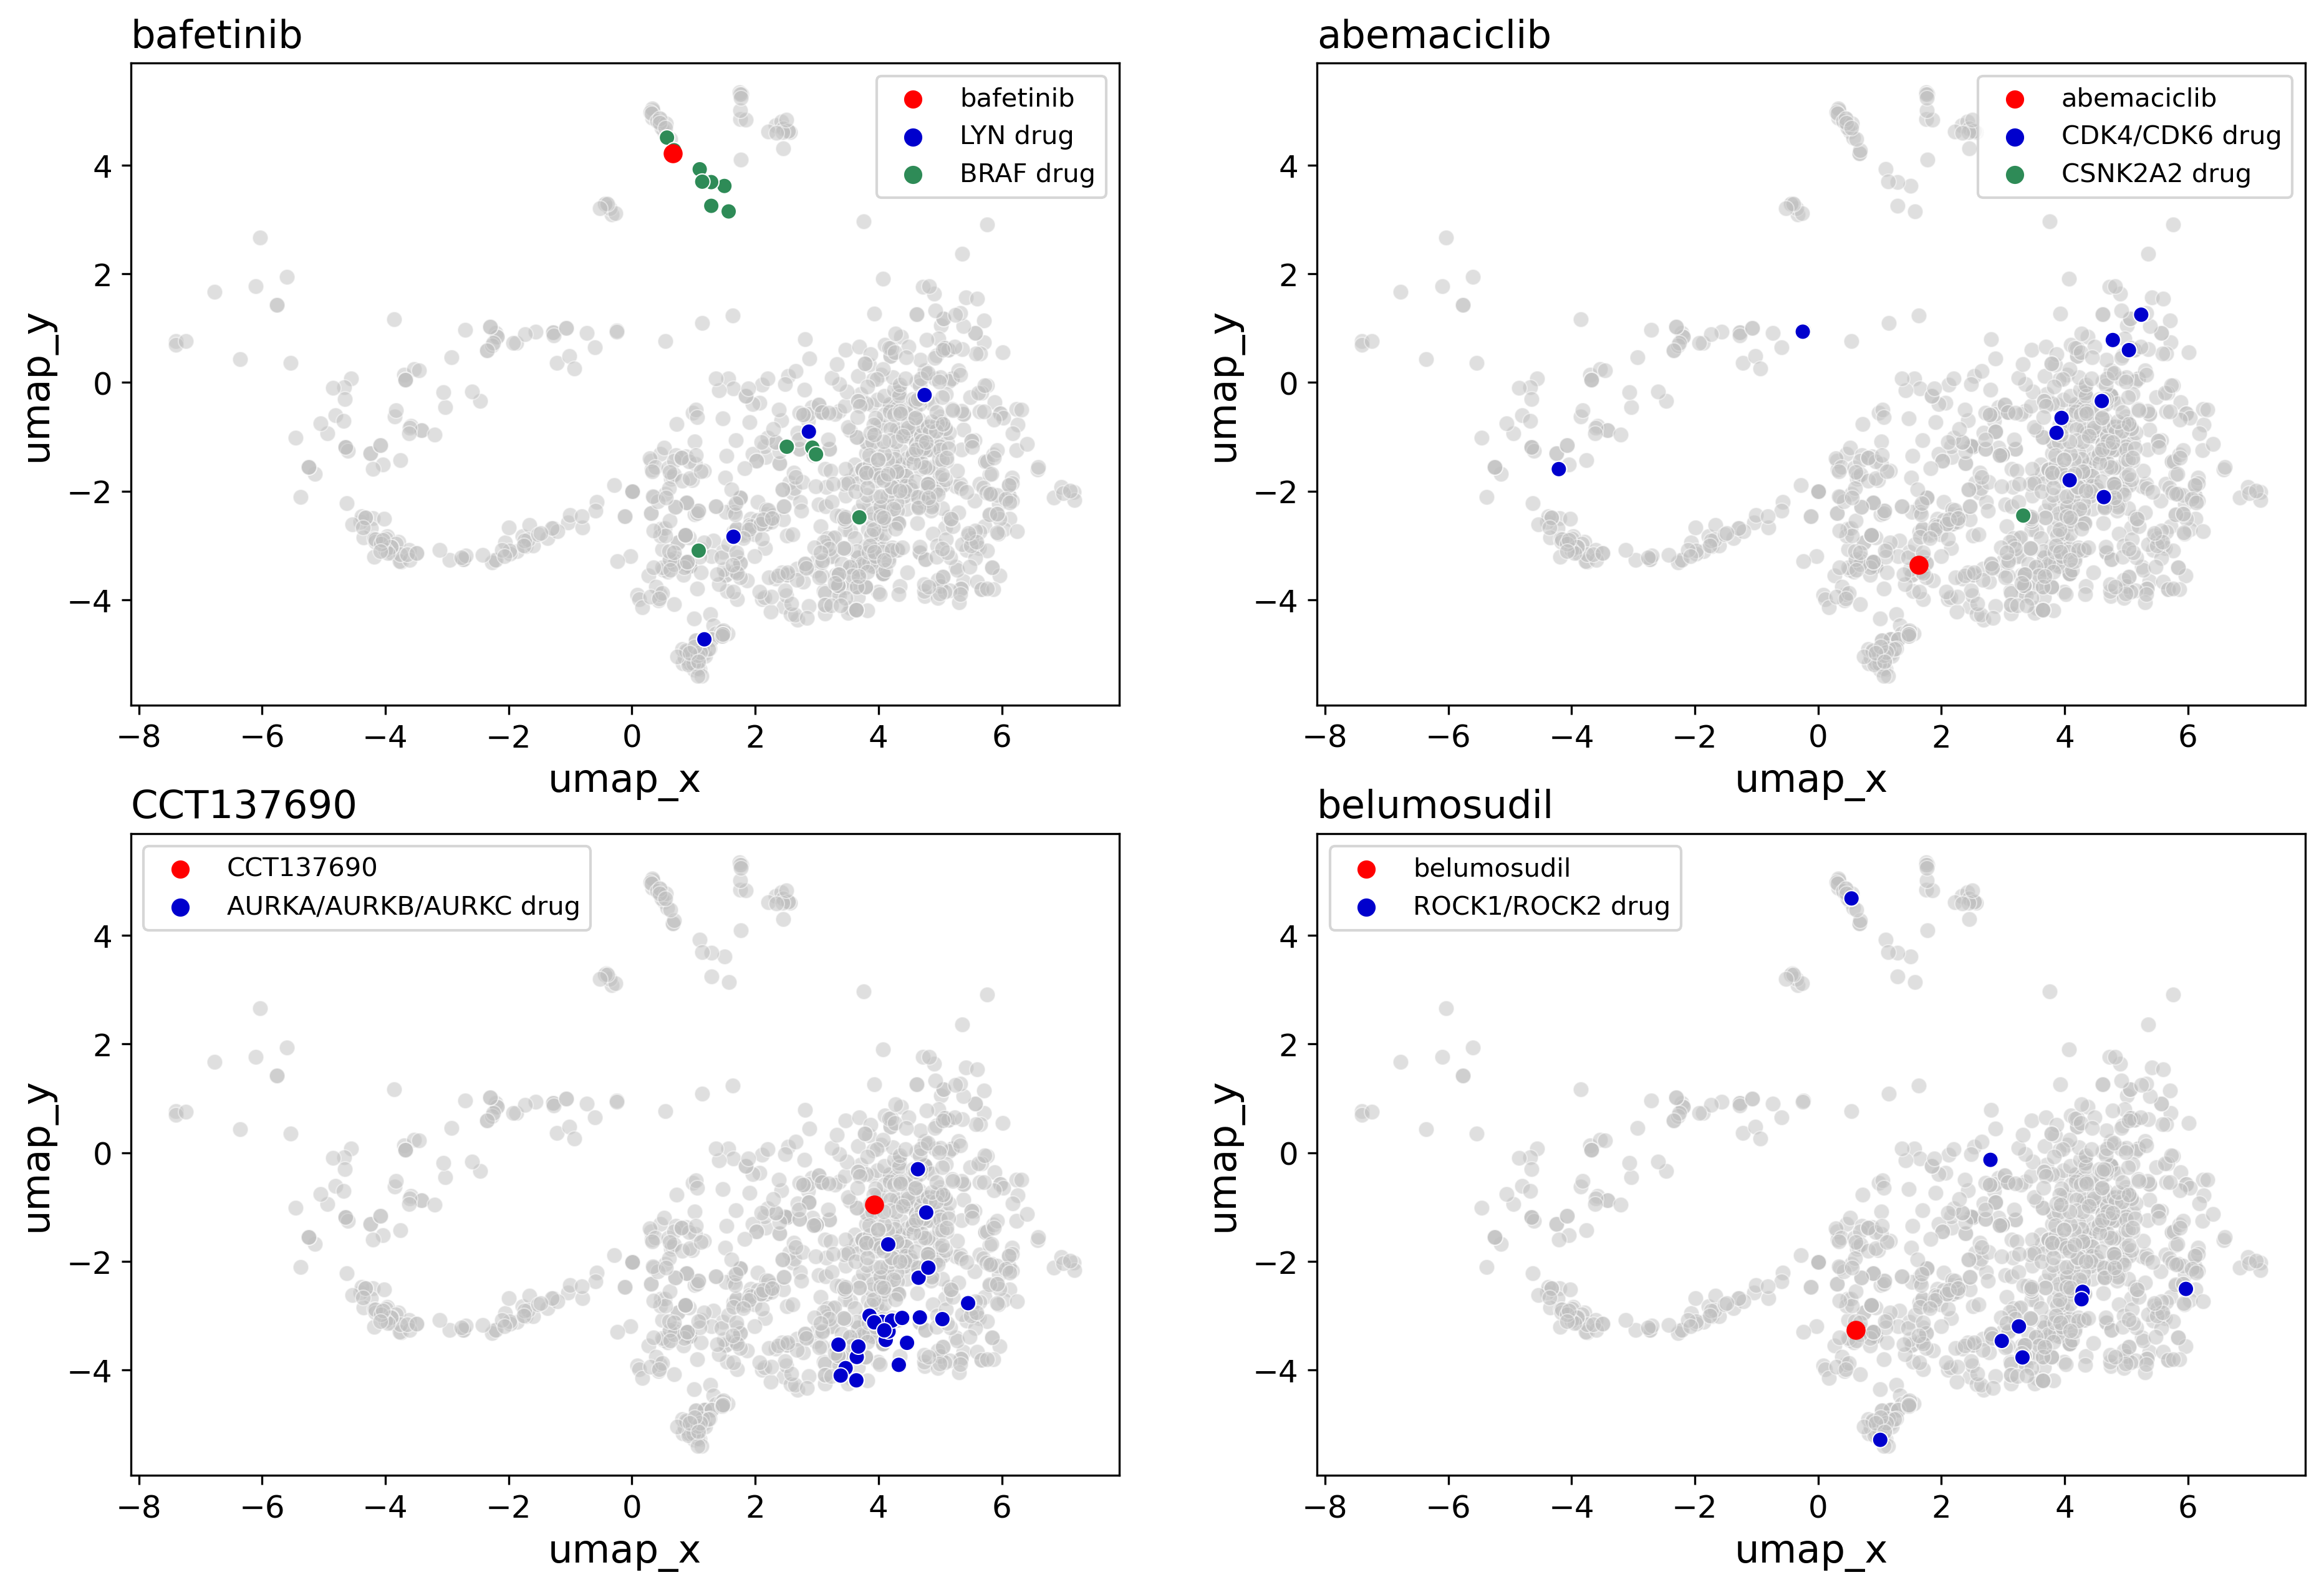

In [3]:
drugs = ['bafetinib', 'abemaciclib', 'CCT137690', 'KD025']
designed_targets = [['LYN'], ['CDK4', 'CDK6'], ['AURKA', 'AURKB','AURKC'], ['ROCK1', 'ROCK2']]
suspicious_targets = [['BRAF'], ['CSNK2A2'], [], []]

plt.figure(dpi = 300, figsize = (15, 10))
for i, d in enumerate(drugs):
    plt.subplot(2,2,1+i)
    plot_drug_umap(drugs[i], designed_targets[i], suspicious_targets[i])